# Isoclassify - Direct

Example use of isoclassify direct method.

Author: Alex Lyttle

In [1]:
# required packages
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import os 
import copy
import glob
import h5py,pdb

import numpy as np
from matplotlib import pylab as plt
import astropy.units as units
from astropy.coordinates import SkyCoord
import mwdust

from isoclassify import DATADIR, PACKAGEDIR
from isoclassify.direct import classify as classify_direct
from isoclassify.extinction import query_dustmodel_coords, extinction

In [2]:
# load BC model
fn = os.path.join(DATADIR,'bcgrid.h5')
bcmodel = h5py.File(fn,'r', driver='core', backing_store=False)

In [32]:
# if we want to use a reddening map, we'll need to add coordinates
x = classify_direct.obsdata()
x.addcoords(243.9052932171665,-08.3694394)

In [33]:
# if we don't want to use a reddening map, isoclassify fits for Av. However, we need to 
# define an extinction law
dustmap = 'allsky'
dustmodel, ext = query_dustmodel_coords(x.ra, x.dec, dustmap)
# ext = extinction('cardelli')

In [34]:
redmap = mwdust.Combined19()

In [35]:
sightLines = SkyCoord(x.ra*units.deg,x.dec*units.deg,frame='galactic')
distanceSamples = np.loadtxt(f"{PACKAGEDIR}/data/distance-samples-green19.txt",delimiter=',')*1000.

In [36]:
redcont = redmap(sightLines.l.value,sightLines.b.value,distanceSamples[:60]/1000.)

In [37]:
redcont

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [41]:
with h5py.File(os.path.join(os.environ['DUST_DIR'], 'combined15/dust-map-3d.h5'),'r') as combineddata:
    pix_info= combineddata['/pixel_info'][:]
    best_fit= combineddata['/best_fit'][:]

In [42]:
best_fit.shape

(2250167, 31)

In [43]:
with h5py.File(os.path.join(os.environ['DUST_DIR'], 'combined19/combine19.h5'),'r') as combineddata:
    pix_info= combineddata['/pixel_info'][:]
    best_fit= combineddata['/best_fit'][:]

In [44]:
best_fit.shape

(4045455, 120)

/Users/ajl573/.virtualenvs/isoclassify/lib/python3.7/site-packages/mwdust/HierarchicalHealpixMap.py:52: RuntimeWarning: divide by zero encountered in log10
  distmod= 5.*numpy.log10(d)+10.



ValueError: Axis limits cannot be NaN or Inf

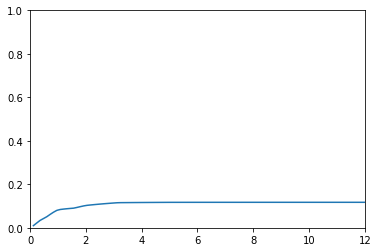

In [20]:
redmap.plot(x.ra, x.dec)

In [22]:
# define class that contains observables
x = classify_direct.obsdata()

In [23]:
# add [Teff, logg, FeH] and [sigma_Teff, sigma_logg, sigma_FeH] 
x.addspec([5777.,4.44,0.0],[60.,0.07,0.04])

In [24]:
# now let's add some more observables, e.g. a parallax 
x.addplx(0.07,0.007)

In [25]:
# and some JHK photometry
x.addjhk([4.38,4.04,4.00],[0.03,0.03,0.03])

In [26]:
# photometry to use for distance modulus. Jmag here
x.addmag([4.38],[0.03])

using max distance: 24.0
using min distance: 10.0
   
teff(K): 5777.0 +/- 60.0
dis(pc): 14.90508905089051 + 1.7619176191761916 - 1.4246542465424668
av(mag): 0.0 + 0.0 - 0.0
rad(rsun): 1.06732286187634 + 0.13029215485924883 - 0.1064081998143106
lum(lsun): 1.1395019245124087 + 0.2884433075690864 - 0.2115007716403795
mabs( jmag ): 3.5122724061803465 + 0.222916368127148 - 0.24499121918116806
mass(msun): 0.0 + 0.0 - 0.0
density(rhosun): 0.0 + 0.0 - 0.0
-----


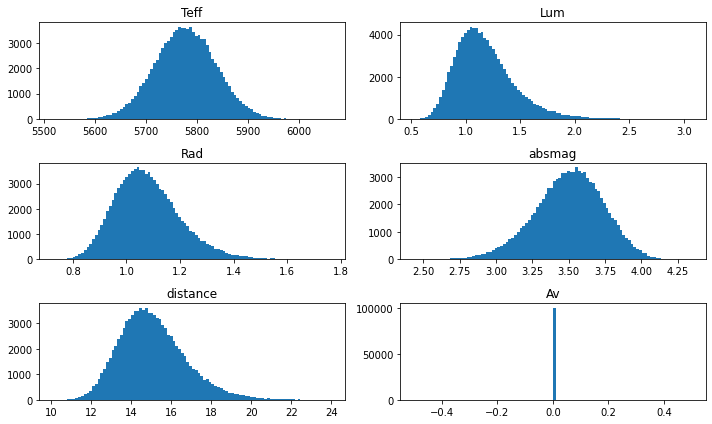

In [27]:
# redo fit, this time using the dustmodel
# perform classification
paras = classify_direct.stparas(input=x, bcmodel=bcmodel, dustmodel=dustmodel,band='jmag', ext=ext, plot=1)